<a href="https://colab.research.google.com/github/smasterparth/opencv/blob/master/Time_Series_Keras_%26_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

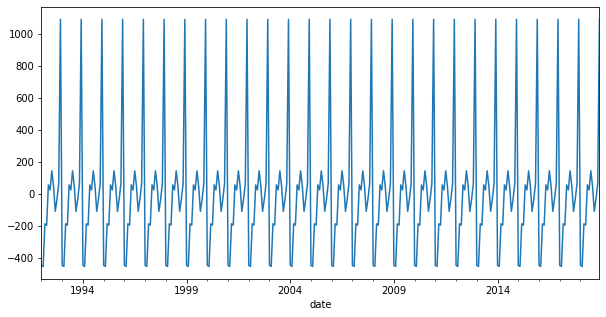

In [216]:
seasonal_result.seasonal.plot(figsize=(10,5))

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
!pip install pmdarima

In [0]:
from pmdarima import auto_arima

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
df = pd.read_csv('BeerWineLiquor.csv' , parse_dates = True , index_col = 0)

In [222]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=324, freq=None)

In [223]:
df.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [224]:
df.index.min , df.index.max

(<bound method DatetimeIndexOpsMixin.min of DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
                '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
                '1992-09-01', '1992-10-01',
                ...
                '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
                '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
                '2018-11-01', '2018-12-01'],
               dtype='datetime64[ns]', name='date', length=324, freq=None)>,
 <bound method DatetimeIndexOpsMixin.max of DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
                '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
                '1992-09-01', '1992-10-01',
                ...
                '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
                '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
                '2018-11-01', '2018-12-01'],
               dtype='datetime64[ns]', name

In [0]:
df.index.freq='MS'

In [226]:
df.index.min()

Timestamp('1992-01-01 00:00:00', freq='MS')

In [227]:
df.index.max()

Timestamp('2018-12-01 00:00:00', freq='MS')

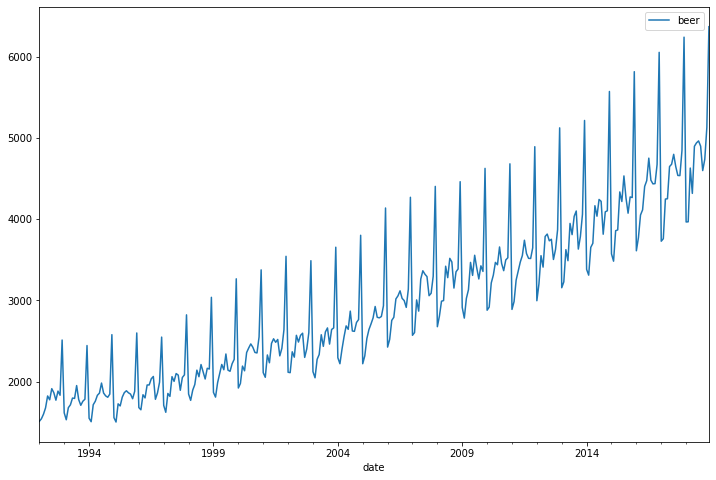

In [228]:
df.plot(figsize=(12,8))

In [0]:
seasonal_result = seasonal_decompose(df['beer'] , model='add')

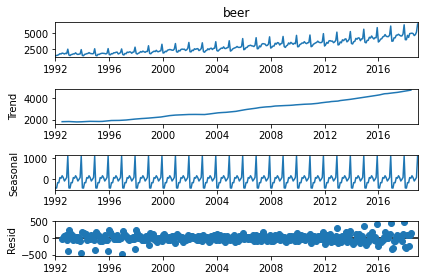

In [230]:
seasonal_result.plot();

In [0]:
from pylab import rcParams

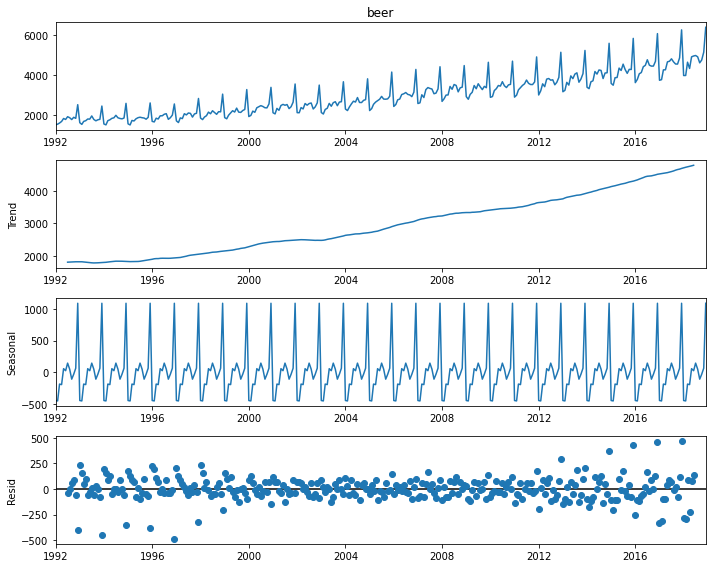

In [232]:
rcParams['figure.figsize']=(10,8)
seasonal_result.plot();

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
def adf_test(series):
  result = adfuller(series.dropna() ,autolag='AIC')
  out = pd.Series(result[0:4] , index = ['ADF Test Statistics' , 'p-value' , '# lags used' , '# observations'])

  for key, val in result[4].items():
    out[f'Critical Value: ({key})'] = val

  print(out.to_string())

  if result[1] <= 0.05:
    print('Data is Stationary')
  else:
    print('Data is non-stationary') 

In [235]:
adf_test(df['beer'])

ADF Test Statistics        2.864309
p-value                    1.000000
# lags used               15.000000
# observations           308.000000
Critical Value: (1%)      -3.451761
Critical Value: (5%)      -2.870970
Critical Value: (10%)     -2.571794
Data is non-stationary


Here Data is coming out to be Non-Stationary which means that DATA is having seasonality attached to it, which is easily visible into the plot of data

In [0]:
rcParams['figure.figsize'] = (10,5)

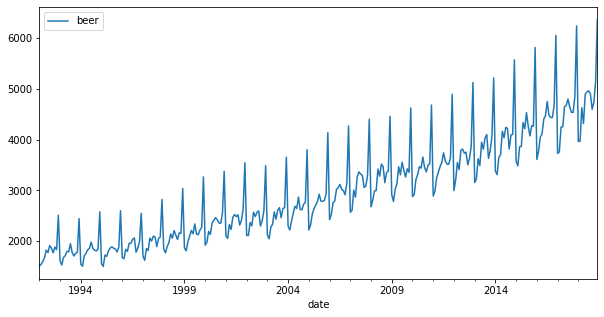

In [237]:
df.plot()

In [239]:
seasonal_result.plot(figsize=(10,4))

TypeError: ignored

We can't change the figsize of above plot of 'seasonal_decompose' because it's an OBJECT of seasonal_decompose

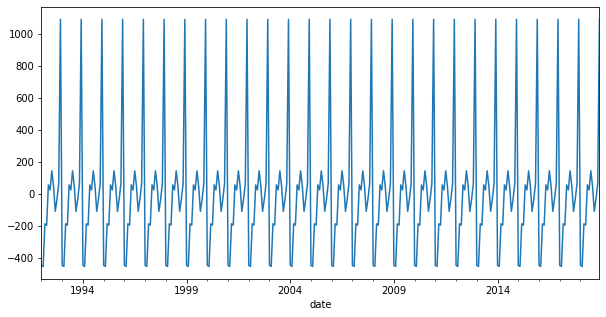

In [240]:
seasonal_result.seasonal.plot(figsize=(10,5))

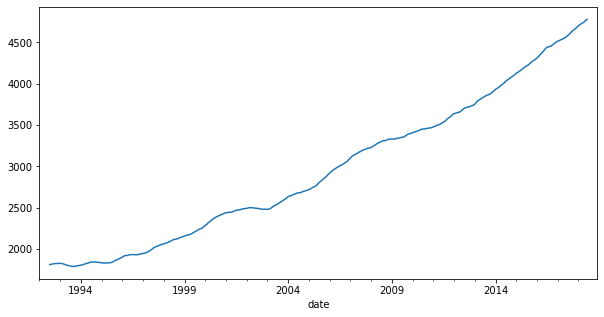

In [241]:
seasonal_result.trend.plot(figsize=(10,5))

In [242]:
len(df)

324

In [0]:
train = df[:312]

In [244]:
len(train)

312

In [0]:
test = df[312:]

In [246]:
len(test)

12

In [247]:
test.head()

,beer
date,
2018-01-01,3965
2018-02-01,3967
2018-03-01,4629
2018-04-01,4317
2018-05-01,4897


In [248]:
test

,beer
date,
2018-01-01,3965
2018-02-01,3967
2018-03-01,4629
2018-04-01,4317
2018-05-01,4897
2018-06-01,4939
2018-07-01,4963
2018-08-01,4898
2018-09-01,4598


# Scaling of Data - Using MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [251]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)

In [0]:
scaled_test = scaler.transform(test)

In [254]:
len(scaled_train)

312

In [255]:
len(scaled_test)

12

In [256]:
type(scaled_train)

numpy.ndarray

In [257]:
scaled_test

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042],
       [0.76561181],
       [1.02721519]])

# TimeSeries Keras Generator

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

TimeseriesGenerator

##### This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

In [259]:
scaled_train[:4]

array([[0.00168776],
       [0.00843882],
       [0.02025316],
       [0.03670886]])

In [0]:
n_input = 3 
n_features = 1

In [0]:
generator = TimeseriesGenerator(scaled_train , scaled_train , length=n_input , batch_size=2)

In [262]:
len(scaled_train)

312

In [263]:
len(generator)

155

In [264]:
generator[0]

(array([[[0.00168776],
         [0.00843882],
         [0.02025316]],
 
        [[0.00843882],
         [0.02025316],
         [0.03670886]]]), array([[0.03670886],
        [0.06772152]]))

In [0]:
X, y = generator[0]

In [266]:
X

array([[[0.00168776],
        [0.00843882],
        [0.02025316]],

       [[0.00843882],
        [0.02025316],
        [0.03670886]]])

In [267]:
y

array([[0.03670886],
       [0.06772152]])

In [268]:
scaled_train[:10]

array([[0.00168776],
       [0.00843882],
       [0.02025316],
       [0.03670886],
       [0.06772152],
       [0.05780591],
       [0.08670886],
       [0.07616034],
       [0.05675105],
       [0.08037975]])

TimeseriesGenerator has divided first 4 values/elements of scaled_train into two different parts.

#### One part is having first 3 values of scaled_train combined together into an array named X

#### Another part is having the fourth value of 'scaled_train' into another array named Y

In [269]:
X.shape

(2, 3, 1)

Shape of X - batch_size , #ROWS , #COLS

In [270]:
y.shape

(2, 1)

Shape of Y - #ROWS , #COLS

Smaller 'batch_size' leads to better result

If we use 'batch_size' of large size, then NN results into OVERFITTING

# Keras Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [0]:
new_input = 12
new_features = 1  # Tells us no. of columns we have

train_generator = TimeseriesGenerator(scaled_train , scaled_train , length=new_input , batch_size=1)

In [0]:
model = Sequential()

model.add(LSTM(150 , activation='relu' , input_shape=(new_input, new_features)))   # Here 150 is no. of Neurons
model.add(Dense(1))
model.compile(optimizer='adam' , loss='mse')

In [274]:
 model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [304]:
model.fit_generator(train_generator , epochs=50)

Epoch 1/50
300/300 [==============================] - 3s 8ms/step - loss: 7.4083e-04
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 5.3665e-04
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 5.6491e-04
Epoch 4/50
300/300 [==============================] - 4s 13ms/step - loss: 5.7396e-04
Epoch 5/50
300/300 [==============================] - 4s 13ms/step - loss: 6.4018e-04
Epoch 6/50
300/300 [==============================] - 3s 11ms/step - loss: 5.9859e-04
Epoch 7/50
300/300 [==============================] - 2s 8ms/step - loss: 5.4331e-04
Epoch 8/50
300/300 [==============================] - 2s 8ms/step - loss: 6.4737e-04
Epoch 9/50
300/300 [==============================] - 2s 8ms/step - loss: 5.4879e-04
Epoch 10/50
300/300 [==============================] - 2s 8ms/step - loss: 5.6678e-04
Epoch 11/50
300/300 [==============================] - 2s 8ms/step - loss: 5.1726e-04
Epoch 12/50
300/300 [==============================] - 2s 8

In [305]:
model.history.history

{'loss': [0.0007408274817417275,
  0.0005366521269144186,
  0.0005649089560719744,
  0.0005739609622523763,
  0.000640180772596987,
  0.000598591513925048,
  0.0005433149571959372,
  0.0006473678995685953,
  0.0005487853847651395,
  0.0005667769526572701,
  0.0005172562267346059,
  0.0005265353431634907,
  0.0004313195514617507,
  0.000492412620868959,
  0.0004957148483855534,
  0.0004995043213651762,
  0.0005110402441076456,
  0.00048124794733375313,
  0.000536388304381165,
  0.0005172113922561768,
  0.000509072498546462,
  0.0006803202544053022,
  0.0004488482843966413,
  0.00045830063461067995,
  0.0003864282308952544,
  0.0004048728820040816,
  0.0004466760172030367,
  0.0005031176221978158,
  0.0004268147424489162,
  0.0004413458842877249,
  0.00041104345047056584,
  0.0004551826615815931,
  0.00046134250135087797,
  0.00047674466961986035,
  0.00045677066970861566,
  0.0004036975784927351,
  0.0005359705341104859,
  0.00042824555827095307,
  0.00042103565126928513,
  0.0005405431

In [0]:
loss = model.history.history['loss']

In [307]:
len(loss)

50

In [0]:
epoch_no = range(len(loss))

In [309]:
epoch_no

range(0, 50)

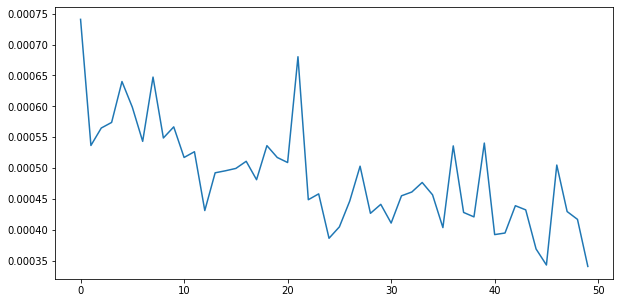

In [310]:
plt.plot(epoch_no , loss)

In [0]:
# Our current model takes 12 I/P steps ----> gives 13th step

In [0]:
# In order to predict 1 step of our test data we need last 12 steps of train data

In [0]:
first_eval_batch = scaled_train[-12:]

In [314]:
first_eval_batch

array([[0.46983122],
       [0.47637131],
       [0.57932489],
       [0.58016878],
       [0.66371308],
       [0.66983122],
       [0.69556962],
       [0.66371308],
       [0.6407173 ],
       [0.64029536],
       [0.7056962 ],
       [1.        ]])

In [315]:
first_eval_batch.shape

(12, 1)

In [0]:
# But we need to have it with a shape of (1,12,1), for that we need to RESHAPE

In [0]:
first_eval_batch = first_eval_batch.reshape((1, new_input, new_features))

In [318]:
first_eval_batch

array([[[0.46983122],
        [0.47637131],
        [0.57932489],
        [0.58016878],
        [0.66371308],
        [0.66983122],
        [0.69556962],
        [0.66371308],
        [0.6407173 ],
        [0.64029536],
        [0.7056962 ],
        [1.        ]]])

In [319]:
first_eval_batch.shape

(1, 12, 1)

In [320]:
model.predict(first_eval_batch)

array([[0.51910967]], dtype=float32)

In [321]:
scaled_train[-12:]

array([[0.46983122],
       [0.47637131],
       [0.57932489],
       [0.58016878],
       [0.66371308],
       [0.66983122],
       [0.69556962],
       [0.66371308],
       [0.6407173 ],
       [0.64029536],
       [0.7056962 ],
       [1.        ]])

In [322]:
first_eval_batch

array([[[0.46983122],
        [0.47637131],
        [0.57932489],
        [0.58016878],
        [0.66371308],
        [0.66983122],
        [0.69556962],
        [0.66371308],
        [0.6407173 ],
        [0.64029536],
        [0.7056962 ],
        [1.        ]]])

In [323]:
scaled_test

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042],
       [0.76561181],
       [1.02721519]])

In [324]:
model.predict(first_eval_batch)

array([[0.51910967]], dtype=float32)

In [325]:
model.predict(first_eval_batch)[0]

array([0.51910967], dtype=float32)

# Forecast

In [326]:
new_input

12

In [0]:
eval_batch = scaled_train[-new_input:]

In [328]:
eval_batch

array([[0.46983122],
       [0.47637131],
       [0.57932489],
       [0.58016878],
       [0.66371308],
       [0.66983122],
       [0.69556962],
       [0.66371308],
       [0.6407173 ],
       [0.64029536],
       [0.7056962 ],
       [1.        ]])

In [0]:
eval_batch = eval_batch.reshape((1, new_input , new_features))

In [330]:
model.predict(eval_batch)[0]

array([0.51910967], dtype=float32)

In [331]:
scaled_test[0]

array([0.51983122])

In [332]:
eval_batch.shape

(1, 12, 1)

In [0]:
test_prediction = [ ]
new_eval_batch = scaled_train[-new_input:]
current_batch = new_eval_batch.reshape((1 , new_input , new_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch = np.append(current_batch[:, 1: , :] , [[current_pred]] , axis=1)

In [336]:
test_prediction

[array([0.51910967], dtype=float32),
 array([0.52762365], dtype=float32),
 array([0.64442486], dtype=float32),
 array([0.6627854], dtype=float32),
 array([0.7458909], dtype=float32),
 array([0.7602154], dtype=float32),
 array([0.7844288], dtype=float32),
 array([0.7536381], dtype=float32),
 array([0.7299831], dtype=float32),
 array([0.7264173], dtype=float32),
 array([0.8020236], dtype=float32),
 array([1.1007582], dtype=float32)]

In [337]:
type(test_prediction)

list

In [339]:
scaled_test

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042],
       [0.76561181],
       [1.02721519]])

In [340]:
test

,beer
date,
2018-01-01,3965
2018-02-01,3967
2018-03-01,4629
2018-04-01,4317
2018-05-01,4897
2018-06-01,4939
2018-07-01,4963
2018-08-01,4898
2018-09-01,4598


In [0]:
true_prediction = scaler.inverse_transform(test_prediction)

In [342]:
test_prediction

[array([0.51910967], dtype=float32),
 array([0.52762365], dtype=float32),
 array([0.64442486], dtype=float32),
 array([0.6627854], dtype=float32),
 array([0.7458909], dtype=float32),
 array([0.7602154], dtype=float32),
 array([0.7844288], dtype=float32),
 array([0.7536381], dtype=float32),
 array([0.7299831], dtype=float32),
 array([0.7264173], dtype=float32),
 array([0.8020236], dtype=float32),
 array([1.1007582], dtype=float32)]

In [343]:
true_prediction

array([[3961.57981849],
       [4001.93611717],
       [4555.57381606],
       [4642.60284758],
       [5036.52293897],
       [5104.42100382],
       [5219.19239497],
       [5073.24454045],
       [4961.11985302],
       [4944.21801662],
       [5302.59181476],
       [6718.59384394]])

In [345]:
test

,beer
date,
2018-01-01,3965
2018-02-01,3967
2018-03-01,4629
2018-04-01,4317
2018-05-01,4897
2018-06-01,4939
2018-07-01,4963
2018-08-01,4898
2018-09-01,4598


In [348]:
test['Predicted'] = true_prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [349]:
test

,beer,Predicted
date,,
2018-01-01,3965,3961.579818
2018-02-01,3967,4001.936117
2018-03-01,4629,4555.573816
2018-04-01,4317,4642.602848
2018-05-01,4897,5036.522939
2018-06-01,4939,5104.421004
2018-07-01,4963,5219.192395
2018-08-01,4898,5073.244540
2018-09-01,4598,4961.119853


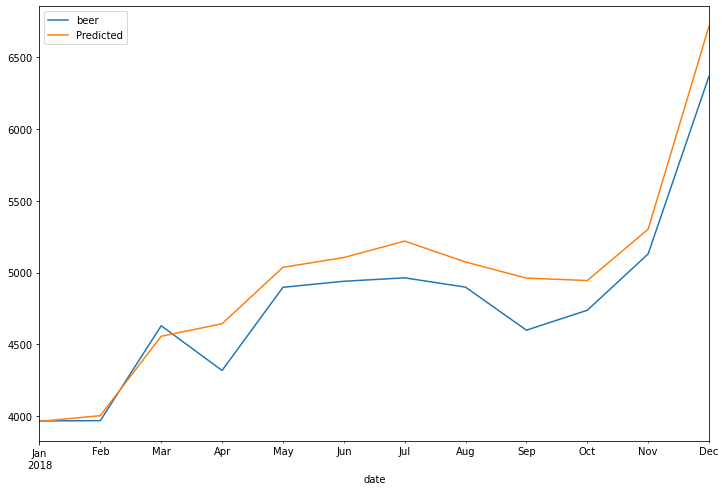

In [351]:
rcParams['figure.figsize'] = (12,8)
test.plot()

In [0]:
model.save('beer_prediction.h5')

In [353]:
pwd

'/content'

In [0]:
from keras.models import load_model

In [0]:
new_model = load_model('beer_prediction.h5')